In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/home/a/anaconda3/envs/tf/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


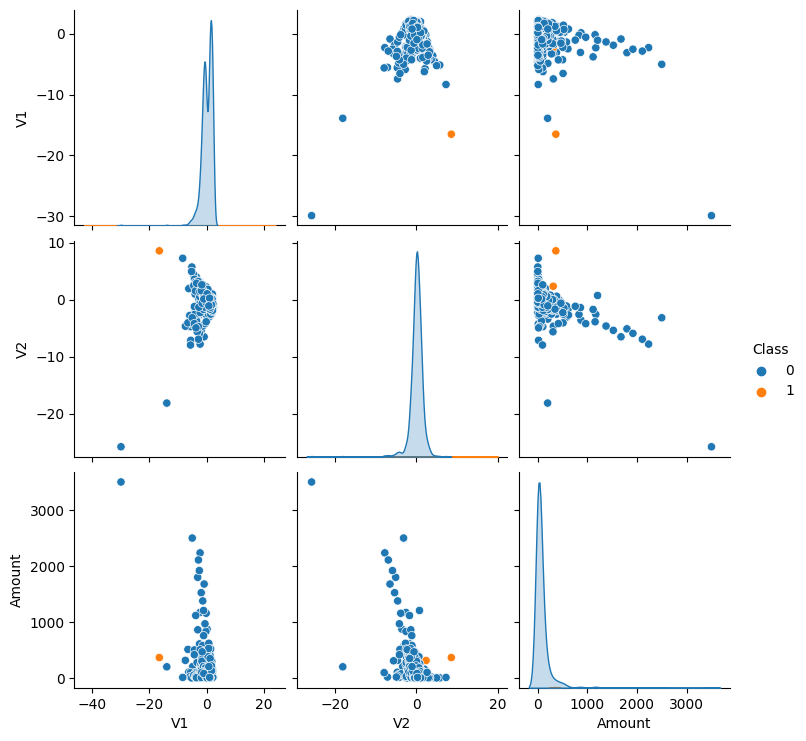

In [3]:
# Assuming you're interested in exploring a subset of features (V1, V2, Amount, Class)
sampled_df = df.sample(n=1000,random_state=42)
sns.pairplot(sampled_df[['V1', 'V2', 'Amount', 'Class']], hue='Class', diag_kind='kde')
plt.show()


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
X = df.drop(columns='Class').copy()
y = df['Class'].copy()

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

[[-1.99658302 -0.69424232 -0.04407492 ...  0.33089162 -0.06378115
   0.24496426]
 [-1.99658302  0.60849633  0.16117592 ... -0.02225568  0.04460752
  -0.34247454]
 [-1.99656197 -0.69350046 -0.81157783 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 1.6419735   0.98002374 -0.18243372 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [ 1.6419735  -0.12275539  0.32125034 ...  0.26960398  0.31668678
  -0.31324853]
 [ 1.64205773 -0.27233093 -0.11489898 ... -0.00598394  0.04134999
   0.51435531]]


### Isolation Forest Algorithm

In [7]:
# Create an Isolation Forest instance for anomaly detection
clf = IsolationForest(contamination=0.1, random_state=42)

# Perform cross-validation for anomaly detection
anomaly_scores = cross_val_predict(clf, X, y, cv=5)

# Compute the percentage of predicted anomalies in each fold
cv_scores = (anomaly_scores == -1).mean()

# Print the results
print("Anomaly Detection using Isolation Forest")
print("Cross-Validation Scores (Percentage of Anomalies):", cv_scores)

Anomaly Detection using Isolation Forest
Cross-Validation Scores (Percentage of Anomalies): 0.12183689305389264


### One Class SVM

In [8]:
clf2 = OneClassSVM(nu=0.05, gamma=0.1, kernel='rbf')
clf2.fit(X_scaled)

OneClassSVM(gamma=0.1, nu=0.05)

In [9]:
anomaly_scores = clf2.decision_function(X_scaled)

In [10]:
roc_auc = roc_auc_score(y, -anomaly_scores)  # Use negative scores for ranking

# Print the AUC-ROC score
print("AUC-ROC Score (One-Class SVM):", roc_auc)

AUC-ROC Score (One-Class SVM): 0.9417041551445358
